## RFM Analysis on Bank Customers

##### The project aims to examine the demographic characteristics of the bank's customers, perform segmentation based on their deposits in the bank, and provide possible recommendations and tactics to utilize the services the bank offers to its depositors in the most optimal way possible.

##### Nowadays, traditional banks face challenges from emerging digital banks and competitors who employ targeted strategies to personalize their products and services in order to retain customers and depositors. Furthermore, due to limited resources, it is crucial for banks to identify the most valuable customer groups, loyal customers, and high-potential groups for future development.

##### The RFM approach which stands for (Recency, Frequency, and Monetary), can serve as a valuable and intuitive approach for banks to categorize their customers and address their business questions and problems. In this analysis, the analyst will utilize sample data to create customer segments based on their transactional behavior and provide recommendations on how bank managers can develop targeted plans for each group to maximize profitability.t.

#### The content in the project:

##### 1.RFM Model: Recency, Frequency, Monetary Score. This is a customer segmentation technique used by businesses to understand and classify their customer base based on their transactional behavior. It is a data-driven approach that provides insights into customer value, engagement, and potential.

##### 2.Pareto Analysis: How many customers contribute to the most transaction volume? In Pareto analysis, data is collected and analyzed to determine which factors or inputs have the most significant impact on a particular outcome. This analysis helps in identifying the "vital few" factors that contribute the most to the desired outcome, as well as the "trivial many" factors that have relatively little impact.

##### 3.Customer Strategy:- This is based on the segmentation and analysis result.,The possibleh strategiesmightd the bank utilize to better allocate its servicing recourses and customizeitsr offerings to the customer

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format',lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

### 1. Data Cleaning¶

In [12]:
# Import the data
data = pd.read_csv("bank_transactions.csv")
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50


In [13]:
print('There are ', len(data), ' transactions/rows and ', data.shape[1], ' columns in our dataset.')

data.count()

There are  1048567  transactions/rows and  9  columns in our dataset.


TransactionID              1048567
CustomerID                 1048567
CustomerDOB                1045170
CustGender                 1047467
CustLocation               1048416
CustAccountBalance         1046198
TransactionDate            1048567
TransactionTime            1048567
TransactionAmount (INR)    1048567
dtype: int64

##### We see that there are 1,048,567 transactions (rows) but some columns have lower counts. This indicates that there are null (empty) values in those columns.

##### Check for the missing values.

In [17]:
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

##### Check for duplicates: The customer might be duplicated given one can make more than 1 transaction.

In [20]:
data.duplicated(subset = 'TransactionID').sum()

0

##### There are no duplicates in the TransactionID column.

##### Drop those subsets with null values for these will not be counted when we group them by Gender, Age, Location, and Account Balance.

In [24]:
data = data.dropna()
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

##### Drop unused field/s.

In [27]:
data.drop('TransactionTime', axis = 1, inplace = True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), object(6)
memory usage: 71.5+ MB


##### Next, we check CustAccountBalance and TransactionAmount (INR) for outliers.

In [32]:
data[['CustAccountBalance', 'TransactionAmount (INR)']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.00,114998.61,846760.94,0.00,4728.14,16768.52,57428.85,115035495.10
TransactionAmount (INR),1041614.00,1566.10,6561.46,0.00,160.00,457.50,1200.00,1560034.99


##### Using the describe function, we see some descriptive statistics for our variables. Notice that there are also large max CustAccountBalance and TransactionAmount (INR) compared to their 75th percentiles.

##### Check the maximum CustAccountBalance

In [36]:
data[data['CustAccountBalance'] == data ['CustAccountBalance'].max()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
40982,T40983,C2916865,3/8/67,M,SHILLONG,115035495.10,27/9/16,6959.00
656264,T656265,C3316830,3/8/67,M,SHILLONG,115035495.10,28/8/16,28019.32
789085,T789086,C6416825,3/8/67,M,SHILLONG,115035495.10,5/9/16,5864.00
826721,T826722,C2216823,3/8/67,M,SHILLONG,115035495.10,4/9/16,4699.00
835641,T835642,C2916887,3/8/67,M,SHILLONG,115035495.10,4/9/16,600.00
876392,T876393,C8116818,3/8/67,M,SHILLONG,115035495.10,8/9/16,3149.00
879623,T879624,C4316889,3/8/67,M,SHILLONG,115035495.10,8/9/16,4364.00
1001213,T1001214,C5916881,3/8/67,M,SHILLONG,115035495.10,14/9/16,1599.00
1002072,T1002073,C5116828,3/8/67,M,SHILLONG,115035495.10,14/9/16,5060.00
1002847,T1002848,C7716886,3/8/67,M,SHILLONG,115035495.10,14/9/16,3604.00


##### Check the maximum TransactionAmount (INR)

In [39]:
data[data['TransactionAmount (INR)'] == data['TransactionAmount (INR)'].max()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
399117,T399118,C7319271,25/5/76,M,GURGAON,42487.89,18/8/16,1560034.99


##### Transform TransactionDate and CustomerDOB to date time format using pd.to_datetime() function.

In [42]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])

##### Check for the distribution of categorical fields.

In [44]:
data[['CustomerID', 'CustGender', 'CustLocation']].describe()

,CustomerID,CustGender,CustLocation
count,1041614,1041614,1041614
unique,879358,3,9275
top,C5533885,M,MUMBAI
freq,6,760978,101997


##### Check for the distribution of numerical fields.

In [48]:
data[['CustAccountBalance', 'TransactionAmount (INR)']].describe()

,CustAccountBalance,TransactionAmount (INR)
count,1041614.00,1041614.00
mean,114998.61,1566.10
std,846760.94,6561.46
min,0.00,0.00
25%,4728.14,160.00
50%,16768.52,457.50
75%,57428.85,1200.00
max,115035495.10,1560034.99


#### Calculate Customer Age

##### Here will use the year in the data (2016) as base to get the customer's age

In [51]:
data['Age'] = data['TransactionDate'].dt.year - data['CustomerDOB'].dt.year

##### Check for the distribution of Age.

In [54]:
data['Age'].describe()

count   1041614.00
mean         30.96
std          50.36
min         -58.00
25%          24.00
50%          28.00
75%          33.00
max         216.00
Name: Age, dtype: float64

##### We can see that there are inconsistencies in the Age column. There is a min of -56 and max of 216.

##### We can transform all the ages below 12 and above 100 percentile into median age.

In [57]:
data.loc[(data['Age'] < 12) | (data['Age'] >= 100),'Age'] = data['Age'].median()

##### Check the contents of CustGender column.

In [60]:
data['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

##### We can see that the CustGender column has one with T value. We can remove this by using the .replace() function.

##### Transform the values of CustGender from 'M' to 'Male', 'F' to 'Female' and 'T' to 'Male'.

In [63]:
data['CustGender'] = data['CustGender'].replace({'M':'Male', 'F':'Female', 'T':'Male'})

In [65]:
data.sample(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
600471,T600472,C3031689,1990-07-10,Female,BANGALORE,919.48,2016-08-26,38.00,26
919558,T919559,C1637756,1996-04-02,Male,RAIPUR,52630.24,2016-12-09,70.00,20
301254,T301255,C3026462,1991-01-15,Male,THANE,1658.85,2016-10-08,199.00,25
597667,T597668,C5219177,2068-03-13,Male,KOCHI,12819.16,2016-08-25,1438.49,28
425507,T425508,C8930445,1983-03-04,Male,GUWAHATI,58011.52,2016-08-17,351.00,33
151578,T151579,C7735224,1991-07-24,Male,NEW DELHI,14989.08,2016-04-08,1186.49,25
1028537,T1028538,C4424836,2068-03-18,Male,DURGAPUR,544479.45,2016-09-13,3601.00,28
528399,T528400,C5927041,1989-11-24,Male,NOIDA,26028.50,2016-08-24,976.00,27
324546,T324547,C4110665,1979-07-26,Male,DELHI,9101.30,2016-08-15,500.00,37
2578,T2579,C3788844,1992-03-27,Male,DELHI,9686.25,2016-10-21,10999.00,24


#### 2. Exploratory Analysis¶

##### We can extend our previous exploratory analysis by looking at the following:

#### 1.Distribution of Transactions per Customer (Frequency)
#### 2.Distribution of Revenue per Customer (Monetary)
#### 3.Total Monthly Revenue
##### Since we are now interested in the monetary aspect of the data, we add the related metrics in our analysis.

In [69]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2016-02-08,25.00,22
1,T2,C2142763,2057-04-04,Male,JHAJJAR,2270.69,2016-02-08,27999.00,28
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2016-02-08,459.00,20
3,T4,C5342380,2073-09-14,Female,MUMBAI,866503.21,2016-02-08,2060.00,28
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2016-02-08,1762.50,28


#### Determine the total count of customers.

In [72]:
data['CustomerID'].nunique()

879358

#### 2.1 Gender

In [75]:
data_customers = data.groupby('CustGender')['TransactionID'].nunique()

data_customers

CustGender
Female    280635
Male      760979
Name: TransactionID, dtype: int64

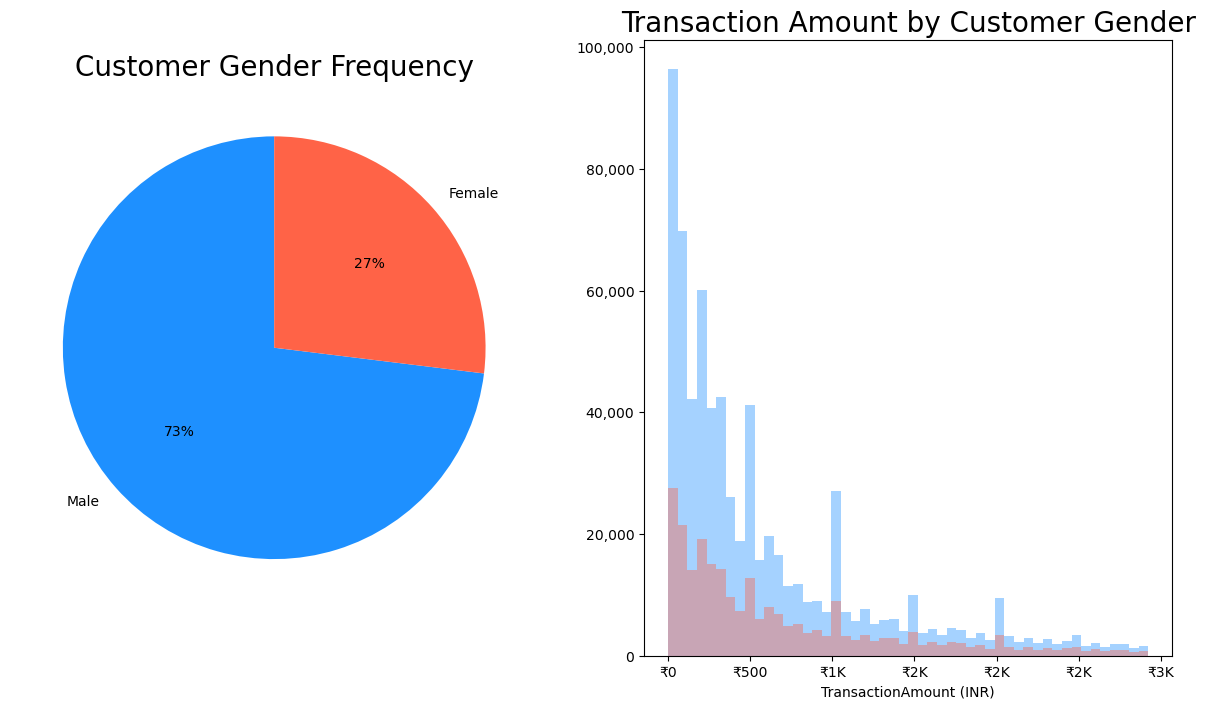

In [77]:
# Define a function that will add the currency symbol to the x-axis major tick labels.
def currency(x, pos):
    """The two arguments are the value and tick position"""
    if x >= 1e6:
        s = '₹{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '₹{:1.0f}K'.format(x*1e-3)
    else:
        s = '₹{:1.0f}'.format(x)
    return s

fig, axs = plt.subplots(ncols = 2,nrows = 1, figsize = (15, 8))

axs[0].pie(data['CustGender'].value_counts(), autopct= '%1.f%%', labels = ['Male', 'Female'], startangle = 90, colors = ['dodgerblue', 'tomato'])
axs[0].set_title("Customer Gender Frequency", size = 20)

axs[1] = sns.distplot(data[(data['CustGender'] == 'Male') & (data['TransactionAmount (INR)'] < np.percentile(data['TransactionAmount (INR)'], 90))]['TransactionAmount (INR)'],
                     label = True, kde = False, color = 'dodgerblue')
axs[1] = sns.distplot(data[(data['CustGender'] == 'Female') & (data['TransactionAmount (INR)'] < np.percentile(data['TransactionAmount (INR)'],90))]['TransactionAmount (INR)'],
                     label = 'Female', kde = False, color = 'tomato')
axs[1].set_title("Transaction Amount by Customer Gender", size = 20)

import matplotlib.ticker as ticker
axs[1].xaxis.set_major_formatter(currency)
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


#### 2.2 Frequency¶

##### Select the top 10 cities with most number of transactions.

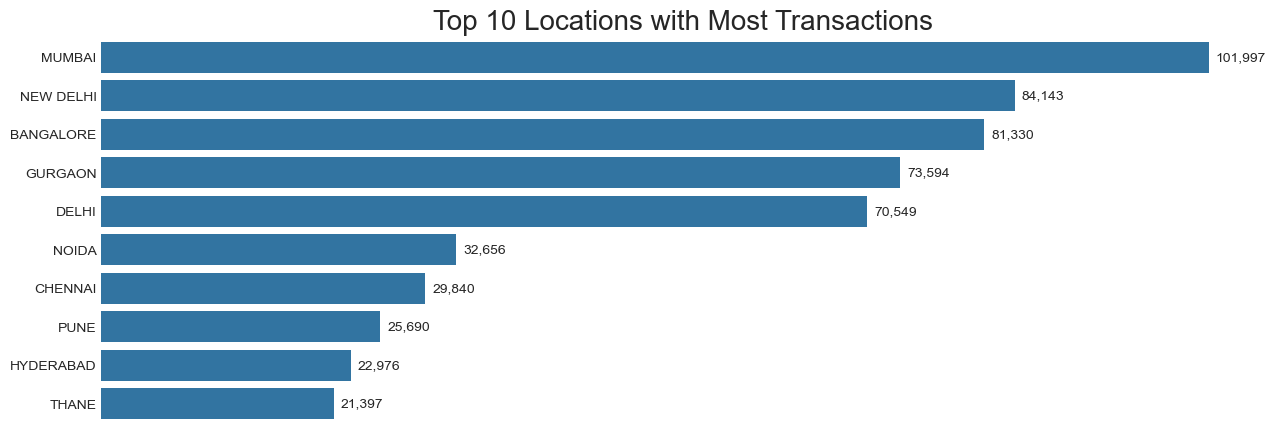

In [81]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 5))

sns.countplot(y='CustLocation', data=data,
              order=data['CustLocation'].value_counts()[:10].index, ax=ax)

ax.set_title("Top 10 Locations with Most Transactions", fontsize='20')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticklabels([])
ax.xaxis.grid(False)

# Remove figure border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels
for p in ax.patches:
    ax.annotate(format(int(p.get_width()), ','),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()

##### As seen from the plot above, Mumbai, New Delhi, Bangalore, Gurgaon, and Delhi are the top 5 cities with the most number of transactions. This could be due to the that the 3 cities have more population, better economic conditions, and a higher salary range.

#### 2.3 Age¶

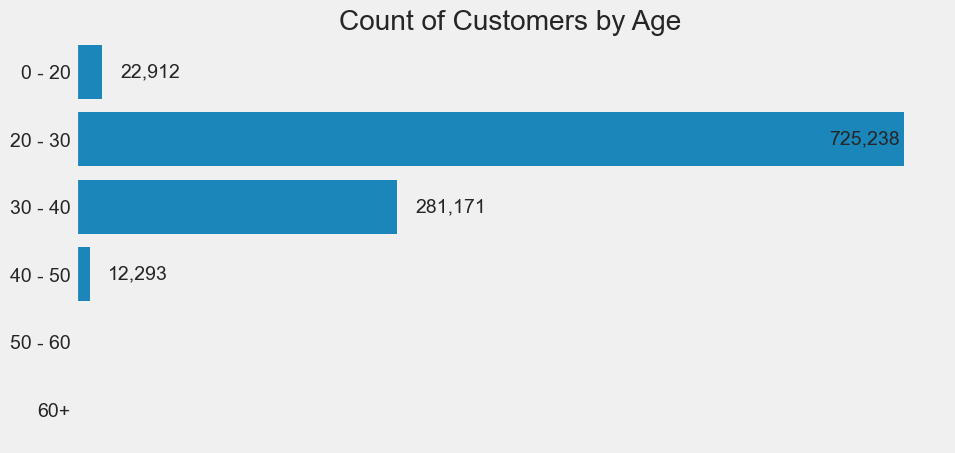

In [84]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60+']
data['AgeBin'] = pd.cut(x = data['Age'], bins = bins, labels = labels, right = True)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(data, y = 'AgeBin', order = labels)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title('Count of Customers by Age')
ax.set_xticklabels([])
ax.xaxis.grid(False)

# Add data labels at the end of the bars
for p in ax.patches:
    width = p.get_width()
    label = format(int(width), ',')  # Convert width to integer before formatting
    x = width + 10000 if width < 700000 else width - 10000  # Adjusted x-coordinate for label position
    ax.annotate(label,
                xy=(x, p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left' if width < 700000 else 'right',  # Adjusted horizontal alignment
                va='center')

plt.show()

#### 3. Customer Segmentation

#### 3.1 RFM Segmentation¶

##### RFM model is commonly used in marketing to segment customers based on their shopping behaviors, then treat each segment with targeted strategies. The three metrics used in the segmentation are:

##### Recency: How many days since the customer's last transaction date? The lower the value, the more loyal the customers are to the company.
##### Frequency: How many times did the customer make transactions during the period? The higher the value, the more active the customers are to our products and services.
##### Monetary: The total amount of transactions or money spent by the customer during the period. This is the most important metric in the model. The higher the value, the more monetary value the customer could bring to the company.
##### Steps of RFM:

##### Step 1: Calculate the raw value of each metric.

##### Step 2: Assign a mark to each raw value based on their distributions.

##### Step 3: Based on the average mark of each metric, decide the class of each customer record (0 or 1, 1 means qualified, 0 means unqualified).

##### Step 4: Segment the customers based on their assigned class (0 or 1).

##### NOTE: The time range selected should be decided by the business team based in a real setting, here just using the whole timeframe in the data. Here we do not take the balance into consideration, given the real transaction would create more value for the business.

##### Step 1: Calculate the raw value of each metrics:

In [89]:
data_RFM = data.copy()
data_RFM = data_RFM.groupby(['CustomerID']).agg(Last_Trans_Date = ('TransactionDate', 'max'),
                                                M = ('TransactionAmount (INR)', 'sum'),
                                                F = ('TransactionID', 'count')).reset_index()

data_RFM.head()

,CustomerID,Last_Trans_Date,M,F
0,C1010011,2016-09-26,5106.00,2
1,C1010012,2016-08-14,1499.00,1
2,C1010014,2016-07-08,1455.00,2
3,C1010018,2016-09-15,30.00,1
4,C1010024,2016-08-18,5000.00,1


##### Recency Calculation¶

##### Use the last transaction date in the data as base, then calculate the difference between each customer's last transaction date to the base

In [91]:
data_RFM['Latest_Trans_Date'] = data_RFM['Last_Trans_Date'].max()
data_RFM['R'] = data_RFM['Latest_Trans_Date'] - data_RFM['Last_Trans_Date']
data_RFM['R'] = (data_RFM['R'] / np.timedelta64(1, 'D')).astype(int)

data_RFM = data_RFM[['CustomerID', 'R', 'F', 'M']]
data_RFM.head()

,CustomerID,R,F,M
0,C1010011,74,2,5106.00
1,C1010012,117,1,1499.00
2,C1010014,154,2,1455.00
3,C1010018,85,1,30.00
4,C1010024,113,1,5000.00


##### Step 2: Assign mark to each raw value based on their distributions¶

##### The marking rule or method is arbitary and should be decided by both business and domain experts.

##### The scoring is based on the five bins of the distribution of each metric.

In [95]:
data_RFM['R_Score'] = np.select(
    [data_RFM['R'] <= 50, data_RFM['R'] <= 100, data_RFM['R'] <= 120, data_RFM['R'] <= 150],
    [5, 4, 3, 2],
    default = 1
)

data_RFM['F_Score'] = np.select(
    [data_RFM['F'] == 5, data_RFM['F'] == 4, data_RFM['F'] == 3, data_RFM['F'] == 2],
    [5, 4, 3, 2],
    default = 1
)

data_RFM['M_Score'] = np.select(
    [data_RFM['M'] > 2000, data_RFM['M'] > 1000, data_RFM['M'] > 500, data_RFM['M'] > 300],
    [5, 4, 3, 2],
    default = 1
)

data_RFM = data_RFM[['CustomerID', 'R', 'R_Score', 'F', 'F_Score', 'M', 'M_Score']]
data_RFM.sample(10)

,CustomerID,R,R_Score,F,F_Score,M,M_Score
514213,C5725923,107,3,1,1,400.00,2
84803,C1742674,91,4,1,1,889.00,3
657289,C7033560,335,1,1,1,200.00,1
293558,C3712084,215,1,2,2,4350.00,5
313815,C3873168,86,4,2,2,530.91,3
242081,C3222332,74,4,2,2,797.95,3
610709,C6622250,215,1,1,1,1599.00,4
517302,C5737632,109,3,2,2,2440.00,5
451806,C5135345,114,3,1,1,30.00,1
118987,C2089040,78,4,1,1,10.00,1


##### The marking strategy is shown below:¶

In [98]:
data_RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
R,879358.00,128.79,80.05,0.00,86.00,109.00,153.00,336.00
R_Score,879358.00,2.87,1.32,1.00,1.00,3.00,4.00,5.00
F,879358.00,1.18,0.45,1.00,1.00,1.00,1.00,6.00
F_Score,879358.00,1.18,0.45,1.00,1.00,1.00,1.00,5.00
M,879358.00,1855.07,7188.32,0.00,200.00,533.00,1500.00,1560034.99
M_Score,879358.00,2.68,1.54,1.00,1.00,3.00,4.00,5.00


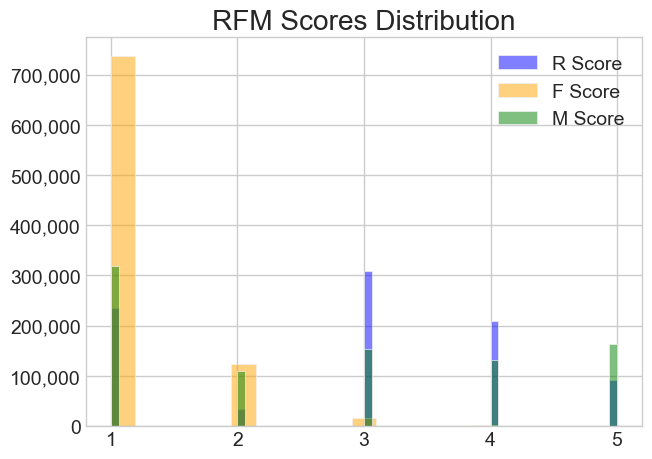

In [100]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots()

sns.histplot(data_RFM['R_Score'], ax = ax, label = 'R Score', color='blue', alpha = 0.5)
sns.histplot(data_RFM['F_Score'], ax = ax, label = 'F Score', color='orange', alpha = 0.5)
sns.histplot(data_RFM['M_Score'], ax = ax, label = 'M Score', color='green', alpha = 0.5)

ax.legend()
plt.xticks(range(1, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('RFM Scores Distribution')
plt.show()

##### From the statistics above, most of the scores of the Monetary, Recency and Frequency metrics are gathered at 1, this shows most customers are ordinary and small group of wealthy customers are highly affecting the whole distribution.

##### Based on the average of each metric score, decide the class of each customer record.

##### We will use the Mean as the decision base and assign all records higher or equal to the Mean to Class 1 and records lower than the Mean to Class 0.

##### The base could be Mean as well, depending on the score distribution and business requirement.

##### In this code, we calculate the means of the 'R_Score', 'F_Score', and 'M_Score' columns using the .mean() method. Then, we use vectorized comparisons (>=) to compare each element in the respective columns with the corresponding mean. The resulting boolean values are converted to integers using .astype(int) and then to strings using .astype(str). Finally, the desired columns are selected and stored in the data_RFM DataFrame.

##### By leveraging vectorized operations, you can perform the calculations efficiently without the need for lambda functions or explicit loops, leading to improved performance.


In [102]:
mean_R_score = data_RFM['R_Score'].mean()
mean_F_score = data_RFM['F_Score'].mean()
mean_M_score = data_RFM['M_Score'].mean()

data_RFM['R'] = (data_RFM['R_Score'] >= mean_R_score).astype(int).astype(str)
data_RFM['F'] = (data_RFM['F_Score'] >= mean_F_score).astype(int).astype(str)
data_RFM['M'] = (data_RFM['M_Score'] >= mean_M_score).astype(int).astype(str)

data_RFM = data_RFM[['CustomerID', 'R', 'F', 'M']]
data_RFM.head()

,CustomerID,R,F,M
0,C1010011,1,1,1
1,C1010012,1,0,1
2,C1010014,0,1,1
3,C1010018,1,0,0
4,C1010024,1,0,1


##### Segment the customers based on their classes¶

##### Below is the criteria used for customer segmentation.

##### Note: Criteria is arbitrary and will depend on the business' domain experts and/or managament

In [104]:
data_RFM['RFM'] = data_RFM['R'] + data_RFM['F'] + data_RFM['M']

conditions = [
    (data_RFM['RFM'] == '111'),
    (data_RFM['RFM'] == '101'),
    (data_RFM['RFM'] == '110'),
    (data_RFM['RFM'] == '011'),
    (data_RFM['RFM'] == '001'),
    (data_RFM['RFM'] == '100'),
    (data_RFM['RFM'] == '010'),
    (data_RFM['RFM'] == '000')
]

values = [
    'Most Valuable Customer',
    'Important Developing Customer',
    'Ordinary Customer',
    'Important Maintaining Customer',
    'Important Recalling Customer',
    'Ordinary Developing Customer',
    'Ordinary Maintaining Customer',
    'Ordinary Recalling Customer'
]

data_RFM['Class'] = np.select(conditions, values, default = '')

In [106]:
data_RFM.sample(5)

,CustomerID,R,F,M,RFM,Class
271755,C3511683,0,0,0,000,Ordinary Recalling Customer
652768,C7017080,0,0,0,000,Ordinary Recalling Customer
445016,C5110563,0,0,0,000,Ordinary Recalling Customer
587290,C6416039,1,0,1,101,Important Developing Customer
689962,C7333037,1,0,0,100,Ordinary Developing Customer


#### Visualize the classes distribution:

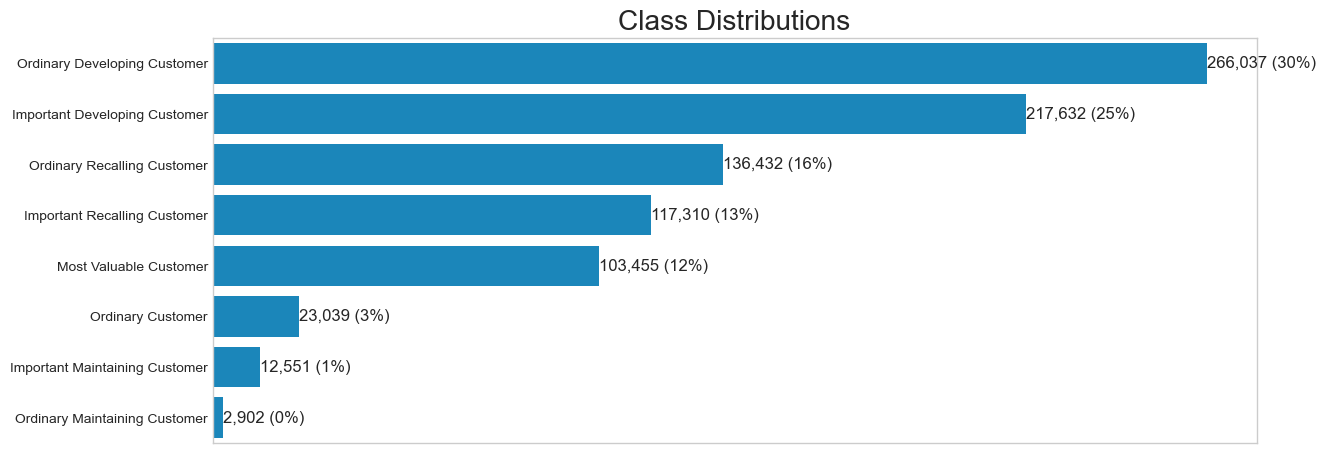

In [111]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=data_RFM, y='Class', order=data_RFM['Class'].value_counts().index)

abs_values = data_RFM['Class'].value_counts(ascending=False)
rel_values = data_RFM['Class'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]:,} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2, lbls[i], va='center', size=12)

plt.title('Class Distributions')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(size=10)

ax.set(xticks=[])

plt.show()

##### 2. Pareto Analysis
##### Pareto analysis, also known as the 80/20 rule or the Pareto principle, is a technique used in decision-making and problem-solving to prioritize and focus efforts on the most significant factors or issues that have the greatest impact. It is named after Italian economist Vilfredo Pareto, who observed that approximately 80% of the wealth in Italy was owned by 20% of the population.

##### Let us check if the valuable customers have made the most contribution to the transaction volume.

##### Group by RFM class and sum up the transaction volume of each class.

In [113]:
from matplotlib.ticker import PercentFormatter

pareto_df = data.groupby(['CustomerID']).agg(Transaction_Amt = ('TransactionAmount (INR)', 'sum')).reset_index()

pareto_df.head()

,CustomerID,Transaction_Amt
0,C1010011,5106.00
1,C1010012,1499.00
2,C1010014,1455.00
3,C1010018,30.00
4,C1010024,5000.00


##### Sort values in descending order

In [116]:
pareto_df = pareto_df.merge(data_RFM[['CustomerID', 'Class']], on = 'CustomerID')
pareto_df = pareto_df[['Class', 'Transaction_Amt']].groupby('Class').sum()
pareto_df = pareto_df.sort_values(by = 'Transaction_Amt', ascending = False)

##### Add cumulative percentage column

In [120]:
pareto_df['Trans_Percent'] = round(pareto_df["Transaction_Amt"] / pareto_df["Transaction_Amt"].sum() * 100, 2)
pareto_df["Cum_Percent"] = round(pareto_df["Transaction_Amt"].cumsum() / pareto_df["Transaction_Amt"].sum() * 100, 2)
print(pareto_df)

                                Transaction_Amt  Trans_Percent  Cum_Percent
Class                                                                      
Important Developing Customer      700799737.26          42.96        42.96
Most Valuable Customer             418328352.94          25.64        68.60
Important Recalling Customer       373439033.58          22.89        91.50
Ordinary Developing Customer        53788222.80           3.30        94.79
Important Maintaining Customer      49147328.88           3.01        97.81
Ordinary Recalling Customer         28210220.35           1.73        99.54
Ordinary Customer                    6705884.14           0.41        99.95
Ordinary Maintaining Customer         848821.77           0.05       100.00


##### Create the Pareto Chart:¶

##### The Pareto Chart below visualizes how the transaction volume is accumulated across the RFM classes.

##### From the chart, we can conclude that the Important Developing Customer, Most Valuable Customer, and Important Recalling Customer classes have contributed to over 90% total transaction volume. These customers account for 50% of the bank's overall customer populatiuon. Even if the number is not 20%, it still shows the important of customer segmentation and targeted service. If we treat the volume as the core KPI, we should focus most our resources providing better products and services to these classes and


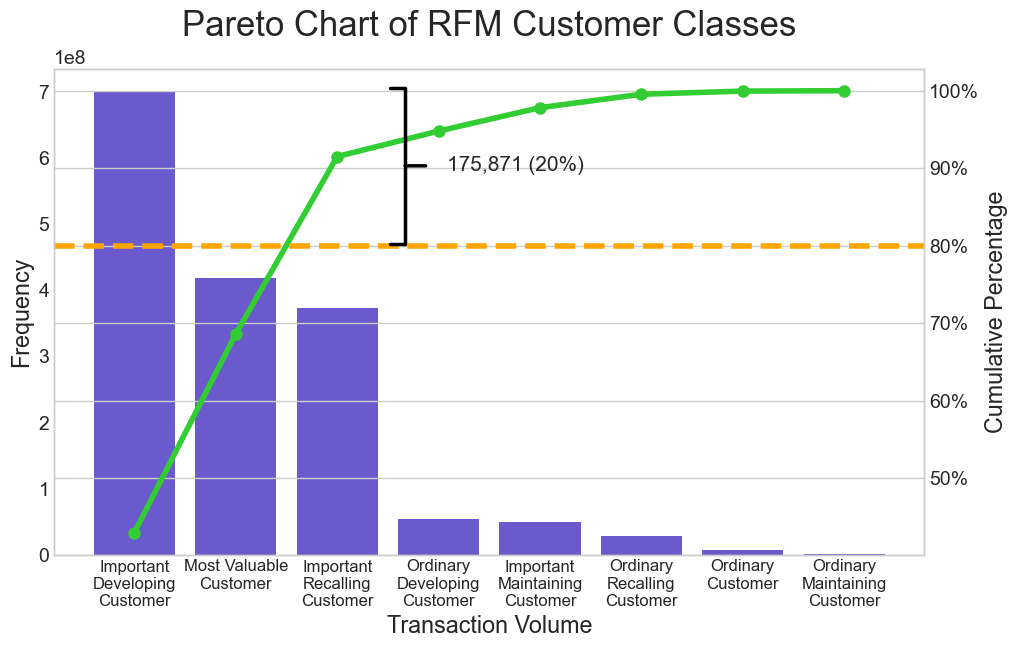

In [123]:
fig, ax = plt.subplots(figsize = (10, 6))

# Bar plot of transaction volume
ax.bar(pareto_df.index, pareto_df["Transaction_Amt"], color = 'slateblue')
ax.set_title("Pareto Chart of RFM Customer Classes", size = 25, y = 1.05)
ax.set_xlabel("Transaction Volume")
ax.set_ylabel("Frequency")
ax.grid(None)

# Line plot of accumulated volume percentage
ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df["Cum_Percent"], color = "limegreen", marker = "o", ms = 8)
ax2.axhline(80, color = "orange", linestyle = "dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")

# Wrap x-axis tick labels
import textwrap
wrapped_labels = [textwrap.fill(label, 15) for label in pareto_df.index]
ax.set_xticklabels(wrapped_labels, size = 12)

# Enlarge and reposition the arrow
annotation_text = "{:,} (20%)".format(int(0.2 * data_RFM.shape[0]))
ax2.annotate("", xy = (0.4, 0.8), xytext = (0.43, 0.8),
            xycoords = 'axes fraction', textcoords = 'axes fraction',
            arrowprops=dict(arrowstyle="-[,widthB = 4.0, lengthB = 0.8", lw = 2.5, color = 'black'),
            annotation_clip=False)


ax2.annotate(annotation_text, xy = (0.53, 0.79),
            xycoords = 'axes fraction', fontsize = 15, ha = 'center')

plt.show()

#### Conclusion

##### The project's goal was to segment bank customers using the RFM (Recency, Frequency, and Monetary) model and then analyze these segments using the Pareto Principle, also known as the 80/20 rule.

##### The analysis revealed that a small portion of the customer base accounts for the majority of the total transaction volume. Specifically, the customer classes identified as "Important Developing Customer," "Most Valuable Customer," and "Important Recalling Customer" contributed to over 90% of the total transaction volume. These three segments together make up about 50% of the bank's total customer population.

##### This finding validates the importance of customer segmentation and targeted service. The conclusion is that the bank should prioritize its resources to provide better products and services to these valuable customer groups in order to maximize profitability and improve customer satisfaction.